In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("./ЛР_5/Data_Lab5/data2.txt")
N, dim = data.shape
k = 3           
epsilon = 1e-4     
max_iter = 300      
np.random.seed(42)

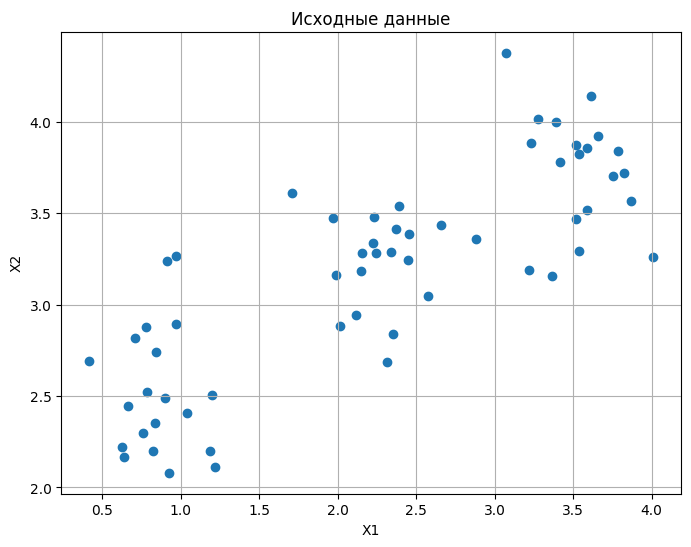

In [2]:

plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1])
plt.title("Исходные данные")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.show() 

In [3]:

indices = np.random.choice(N, k, replace=False)
centers = data[indices].copy()

previous_Q = np.inf
labels = np.zeros(N, dtype=int)

for m in range(max_iter):
    # Вычисление квадратов евклидовых расстояний от каждой точки до каждого центра
    distances = np.linalg.norm(data[:, np.newaxis] - centers, axis=2)**2
    
    # Присвоение каждой точке номера ближайшего центра (кластера)
    labels = np.argmin(distances, axis=1)
    
    # Вычисление функционала качества Q2: сумма квадратов расстояний до центров кластеров
    Q = 0
    for j in range(k):
        cluster_points = data[labels == j]
        if cluster_points.size > 0:
            Q += np.sum(np.linalg.norm(cluster_points - centers[j], axis=1)**2)
    
    # Проверка условия остановки: если изменение функционала меньше epsilon, прерываем цикл
    if abs(previous_Q - Q) <= epsilon:
        print(f"Сходимость достигнута на итерации {m}.")
        break
    previous_Q = Q
    
    # Обновление центров кластеров: каждый новый центр — среднее арифметическое точек кластера
    for j in range(k):
        cluster_points = data[labels == j]
        if cluster_points.size > 0:
            centers[j] = np.mean(cluster_points, axis=0)


print("Центры кластеров:")
print(centers)
print("Финальное значение Q:", Q)

Сходимость достигнута на итерации 5.
Центры кластеров:
[[0.8588467  2.52637927]
 [3.53975168 3.71941449]
 [2.27872494 3.24333555]]
Финальное значение Q: 8.832517940129101


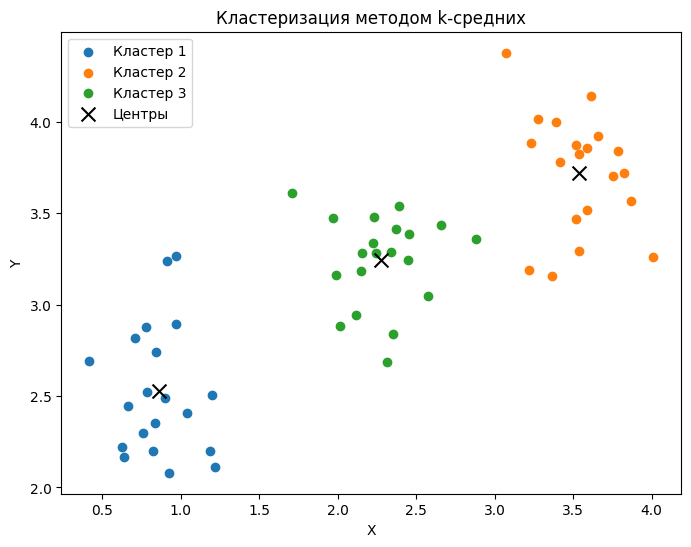

In [4]:

plt.figure(figsize=(8, 6))
for j in range(k):
    plt.scatter(data[labels == j, 0], data[labels == j, 1], label=f"Кластер {j+1}")


plt.scatter(centers[:, 0], centers[:, 1], marker="x", color="black", s=100, label="Центры")
plt.title("Кластеризация методом k-средних")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

In [5]:
# TODO : add Sieve grapth ploting